# Implementing Polynomial Regression 

In [141]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

### Creating Dataset

In [142]:
X = 6*np.random.rand(300,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.rand(300,1)
# Quadratic Equation of y = 0.5x^2 + 1.5x + 2 + outliers

Text(0, 0.5, 'y dataset (dependent)')

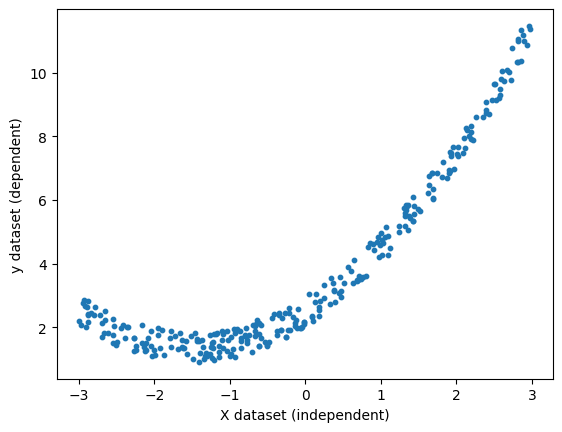

In [143]:
plt.scatter(X,y,s=10)
plt.xlabel("X dataset (independent)")
plt.ylabel("y dataset (dependent)")

###  Train Test Split 

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

#### First trying Linear Regression to solve 

In [145]:
from sklearn.linear_model import LinearRegression
regression1 = LinearRegression()
regression1.fit(X_train,y_train)
preds1 = regression1.predict(X_test)

In [146]:
from sklearn.metrics import r2_score
r2_score_1 = r2_score(y_test,preds1)
r2_score_1

0.7919402761351649

Text(0, 0.5, 'y_test & prediction with LinearRegression')

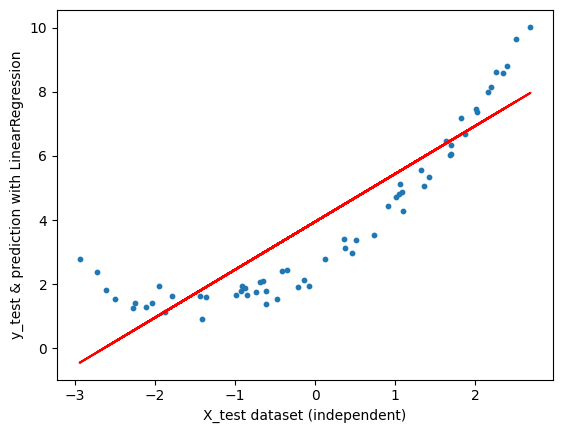

In [147]:
plt.plot(X_test,preds1,c='r')
plt.scatter(X_test,y_test,s=10)
plt.xlabel("X_test dataset (independent)")
plt.ylabel("y_test & prediction with LinearRegression")

### Applying Polynomial Tranformation

In [148]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

In [149]:
regression2 = LinearRegression()
regression2.fit(X_train_poly,y_train)
preds2 = regression2.predict(X_test_poly)

In [150]:
r2_score_2 = r2_score(y_test,preds2)
r2_score_2

0.9872941458218472

#### r2 score has increased in Polynomial regression than from linear regression


Text(0, 0.5, 'y_test & prediction with PolynomialRegression')

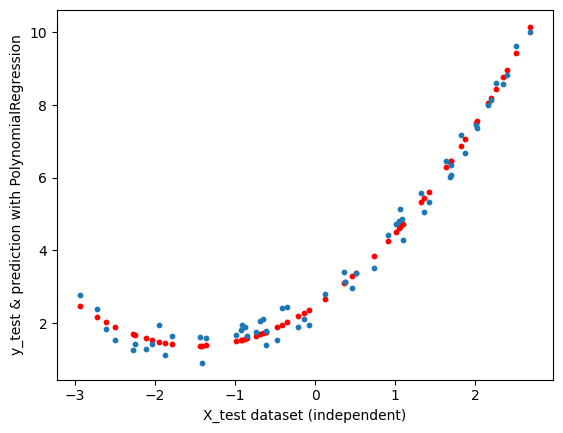

In [154]:
plt.scatter(X_test,preds2,c='r',s=10)
plt.scatter(X_test,y_test,s=10)
plt.xlabel("X_test dataset (independent)")
plt.ylabel("y_test & prediction with PolynomialRegression")

## Predicting on new data


In [158]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.fit_transform(X_new)

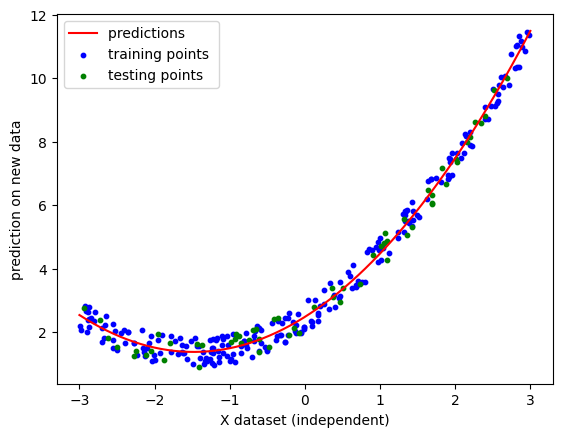

In [166]:
new_preds = regression2.predict(X_new_poly)
plt.plot(X_new,new_preds,c='r',label='predictions ')
plt.scatter(X_train,y_train,c='b',s=10,label='training points ')
plt.scatter(X_test,y_test,c='g',s=10,label='testing points ')
plt.xlabel("X dataset (independent)")
plt.ylabel("prediction on new data")
plt.legend()
plt.show()